## 5. __Mahalanobis Distance for Multivariate Outlier Detection__

__Why Mahalanobis distance is incredibly powerful for outlier Detection?__

Multivariate outlier is the combination of unusual values in two or more variables in the dataset. Or in words, the entire observation (row in a dataset) is an outlier and that reflects usually in more than 1 column in the dataset. That is, the complete row is an outlier rather than just 1 value in a column variable.  


[Mahalanobis distance](https://www.machinelearningplus.com/statistics/mahalanobis-distance/) is an effective multivariate distance metric that measures the distance between a point (vector) and a distribution. It is effectively a multivariate equivalent of the Euclidean distance.

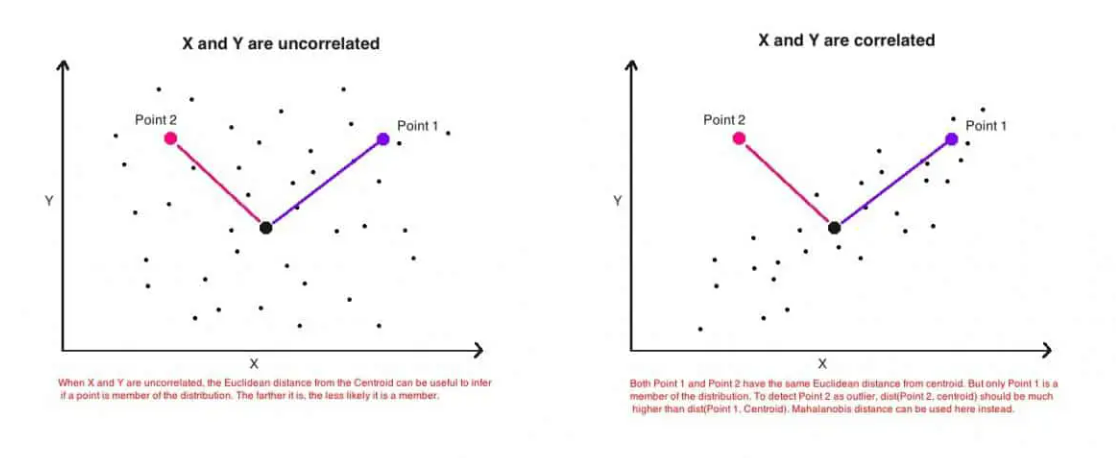

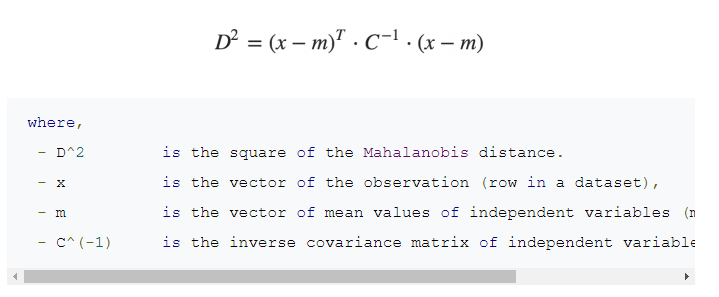

Source: machinelearningplus.com


It works well on multivariate data because:

1. It uses the covariance matrix of variables to first remove the correlation effects that exist between the variables. 

2. Then it finds the distance between the multivariate data point and the center (mean). 

This means that MD detects outliers based on the distribution pattern of data points, unlike the Euclidean distance.

In [174]:
# Read data
import scipy.optimize
filepath = 'Churn_Modelling.csv'
df = pd.read_csv(filepath)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
# Compute Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

cols = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']
df_x = df[cols]#.head(500)
df_x['mahala'] = mahalanobis(x=df_x, data=df[cols])
df_x.head()

C:\Users\Akash\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,CreditScore,Balance,EstimatedSalary,Age,mahala
0,619,0.00,101348.88,42,1.712519
1,608,83807.86,112542.58,41,0.291916
2,502,159660.80,113931.57,42,4.276281
3,699,0.00,93826.63,39,1.772279
4,850,125510.82,79084.10,43,5.133731


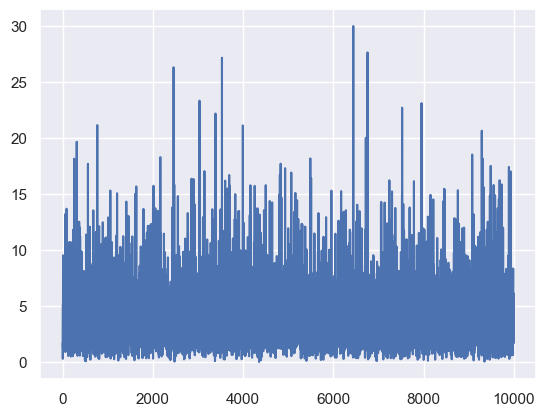

In [182]:
# Mahalanobis distance profile
df_x['mahala'].plot();

__Extract the Extreme Observations__

In [183]:
# Outliers
df_x[df_x['mahala'] > 20]

,CreditScore,Balance,EstimatedSalary,Age,mahala
766,700,0.00,182055.36,82,21.132228
2458,513,0.00,52952.24,88,26.286137
3033,787,0.00,116537.96,85,23.309068
3387,537,92242.34,186235.98,84,22.160658
3531,408,87873.39,188484.52,84,27.136189
3994,809,0.00,34164.05,80,21.103397
6443,753,121513.31,195563.99,92,29.965877
6759,705,126076.24,34436.83,92,27.612241
7526,850,0.00,59568.24,81,22.682658
7956,850,0.00,44827.47,81,23.084298


__View the outliers__

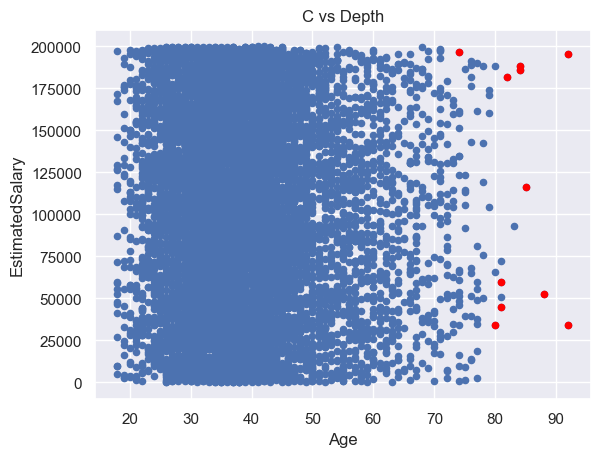

In [189]:
# view the outliers
ax1 = df_x.plot.scatter('Age', 'EstimatedSalary', title="CreditScore vs Balance");
df_x[df_x['mahala'] > 20].plot.scatter('Age', 'EstimatedSalary', 
                                       title="Age vs EstimatedSalary", 
                                       color='red', ax=ax1);